In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import json
import os
import sys
from typing import Dict, Any

# This notebook requires the 'analysis' dependencies
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError:
    print("="*50)
    print("ERROR: Missing dependencies. Please install 'analysis' extras:")
    print("  pip install -e \".[analysis]\"")
    print("="*50)
    raise

# Path Setup
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import our custom plotting functions
from utils.plotting import (
    plot_improvement_by_size, 
    plot_absolute_fitness_comparison
)

In [2]:
# Configuration

# This is the single input file for this report
RESULTS_FILE = os.path.join(project_root, "experiments/showcase_results.json")

# Define problem categories (optional, but helps for analysis)
PROBLEM_CATEGORIES = {
    "small": [10, 20, 50],
    "medium": [100, 200],
    "large": [500, 1000]
}

In [3]:
# Load the JSON results and convert them into a Pandas DataFrame
# for easy analysis and plotting.

print(f"Loading results from {RESULTS_FILE}...")
try:
    with open(RESULTS_FILE, 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print(f"ERROR: Results file not found.")
    print(f"Please run 'scripts/03_run_showcase.py' first.")
    raise

# Convert the dictionary of results into a DataFrame
# 'orient="index"' makes each problem_name a row index
df = pd.DataFrame.from_dict(data, orient='index')

# Data Cleaning & Feature Engineering
# Drop rows where the run failed
df.dropna(inplace=True)

# Extract problem type and size from the index (file names)
regex_pattern = r'problem_(?P<type>[gr]\d*)_(?P<size>\d+)\.npy'
extracted_data = df.index.str.extract(regex_pattern)

# Add extracted data as new columns
df['problem_type'] = extracted_data['type'].values
df['problem_size'] = extracted_data['size'].values.astype(int) # Convert size to integer

# Filter out only the 'g' (valid) problems, as the 'r' problems
# should all have 'null' values anyway from the baseline step.
df = df[df['problem_type'] == 'g'].copy()

print(f"Data loaded and processed for {len(df)} valid problems.")
df.head()

Loading results from /Users/andrea_difelice/Desktop/Computational Intelligence/CI2025_lab2/experiments/showcase_results.json...
Data loaded and processed for 7 valid problems.


,mean_fitness,std_fitness,best_fitness,worst_fitness,median_fitness,baseline_fitness_hc,mean_improvement_pct,problem_type,problem_size
problem_g_500.npy,-41750.157358,815.800447,-40122.044506,-43090.563343,-41706.379523,-40104.876991,-4.102445,g,500
problem_g_100.npy,-4575.799794,116.161977,-4416.894579,-4781.710637,-4594.150242,-5945.378406,23.036021,g,100
problem_g_10.npy,-1497.663648,0.000000,-1497.663648,-1497.663648,-1497.663648,-1497.663648,0.000000,g,10
problem_g_200.npy,-10745.356062,347.214442,-10210.280245,-11304.976473,-10738.956148,-13511.140219,20.470398,g,200
problem_g_50.npy,-2838.475364,91.442460,-2714.925834,-3003.428286,-2814.434826,-3244.676625,12.519006,g,50


In [4]:
# Calculate the single "headline" number: the average
# improvement over the baseline across all valid problems.

# 'mean_improvement_pct' is already in the DataFrame,
# calculated by the 03_run_showcase script.
overall_avg_improvement = df['mean_improvement_pct'].mean()
overall_median_improvement = df['mean_improvement_pct'].median()

print("--- Overall Performance Report (All 'g' Problems) ---")
print(f"  Mean Improvement vs. HC: {overall_avg_improvement:.2f}%")
print(f"Median Improvement vs. HC: {overall_median_improvement:.2f}%")
print("--------------------------------------------------")

--- Overall Performance Report (All 'g' Problems) ---
  Mean Improvement vs. HC: 4.25%
Median Improvement vs. HC: 0.00%
--------------------------------------------------


Generating Plot 1: % Improvement vs. Problem Size...
Generating Plot 1: % Improvement vs. Problem Size...


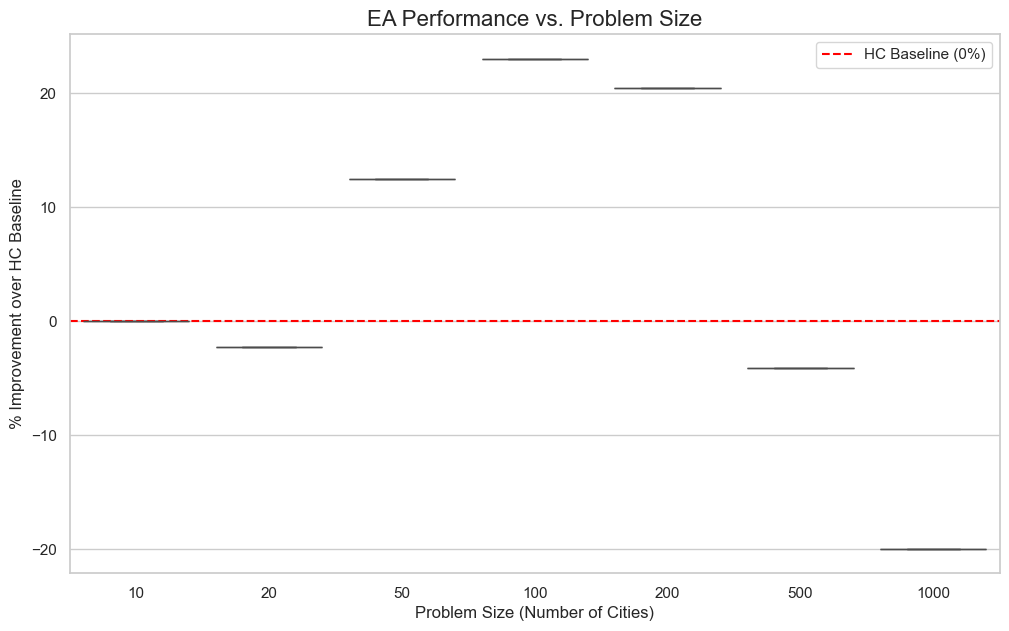

In [5]:
print("Generating Plot 1: % Improvement vs. Problem Size...")
plot_improvement_by_size(
    df,
    save_path=os.path.join(project_root, "experiments/plot_01_improvement_by_size.png"),
    show=True
)

Generating Plot 2: Absolute Fitness (EA vs. HC)...
Generating Plot 2: Absolute Fitness (EA vs. HC)...


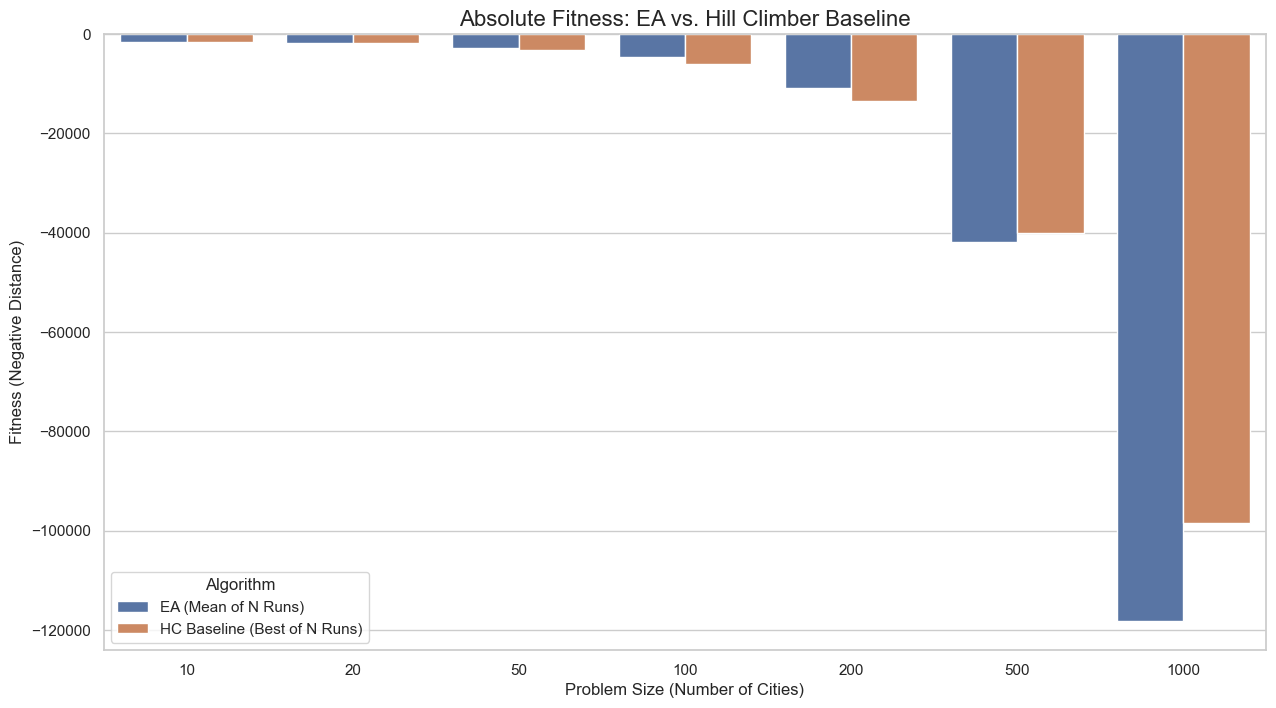

In [6]:
print("Generating Plot 2: Absolute Fitness (EA vs. HC)...")
plot_absolute_fitness_comparison(
    df,
    save_path=os.path.join(project_root, "experiments/plot_02_absolute_fitness.png"),
    show=True
)